<a href="https://colab.research.google.com/github/tinatoufica/Machine/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#importing the dependencies#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, auc,roc_curve, f1_score
from sklearn.model_selection import KFold


#Importing the model#

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Data Preprocessing#

In [3]:
#load the dataset#
heart_dataset = pd.read_csv("/content/heart.csv")

In [4]:
#first 5 rows#
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_dataset['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

1--heart disease

0--normal

In [6]:
#separating data & labels#

X = heart_dataset.drop(columns='output',axis=1)
Y = heart_dataset['output']

In [7]:
#number of rows and columns#
heart_dataset.shape

(303, 14)

In [8]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#checking missing value#
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
#statistical measure#
heart_dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Data Visualization#

In [11]:
sns.set()
sns.set_theme()


<ipython-input-12-690c52868e49>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output',data = heart_dataset, palette= "Set2")


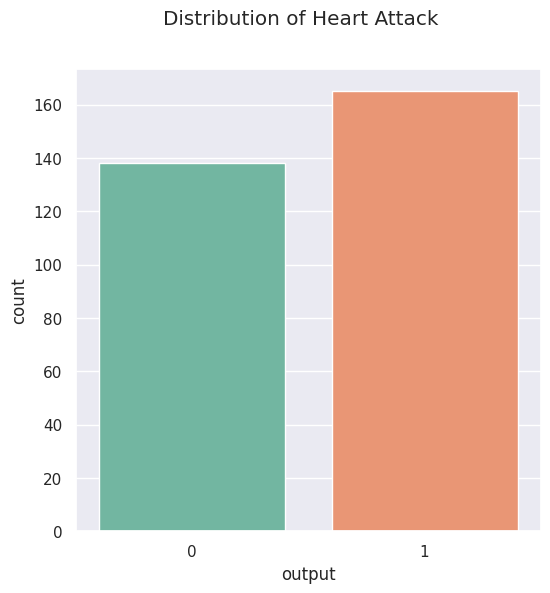

In [12]:
# distribution of target variable#
fig= plt.figure(figsize = (6,6))
sns.countplot(x='output',data = heart_dataset, palette= "Set2")
plt.suptitle("Distribution of Heart Attack")
plt.show()

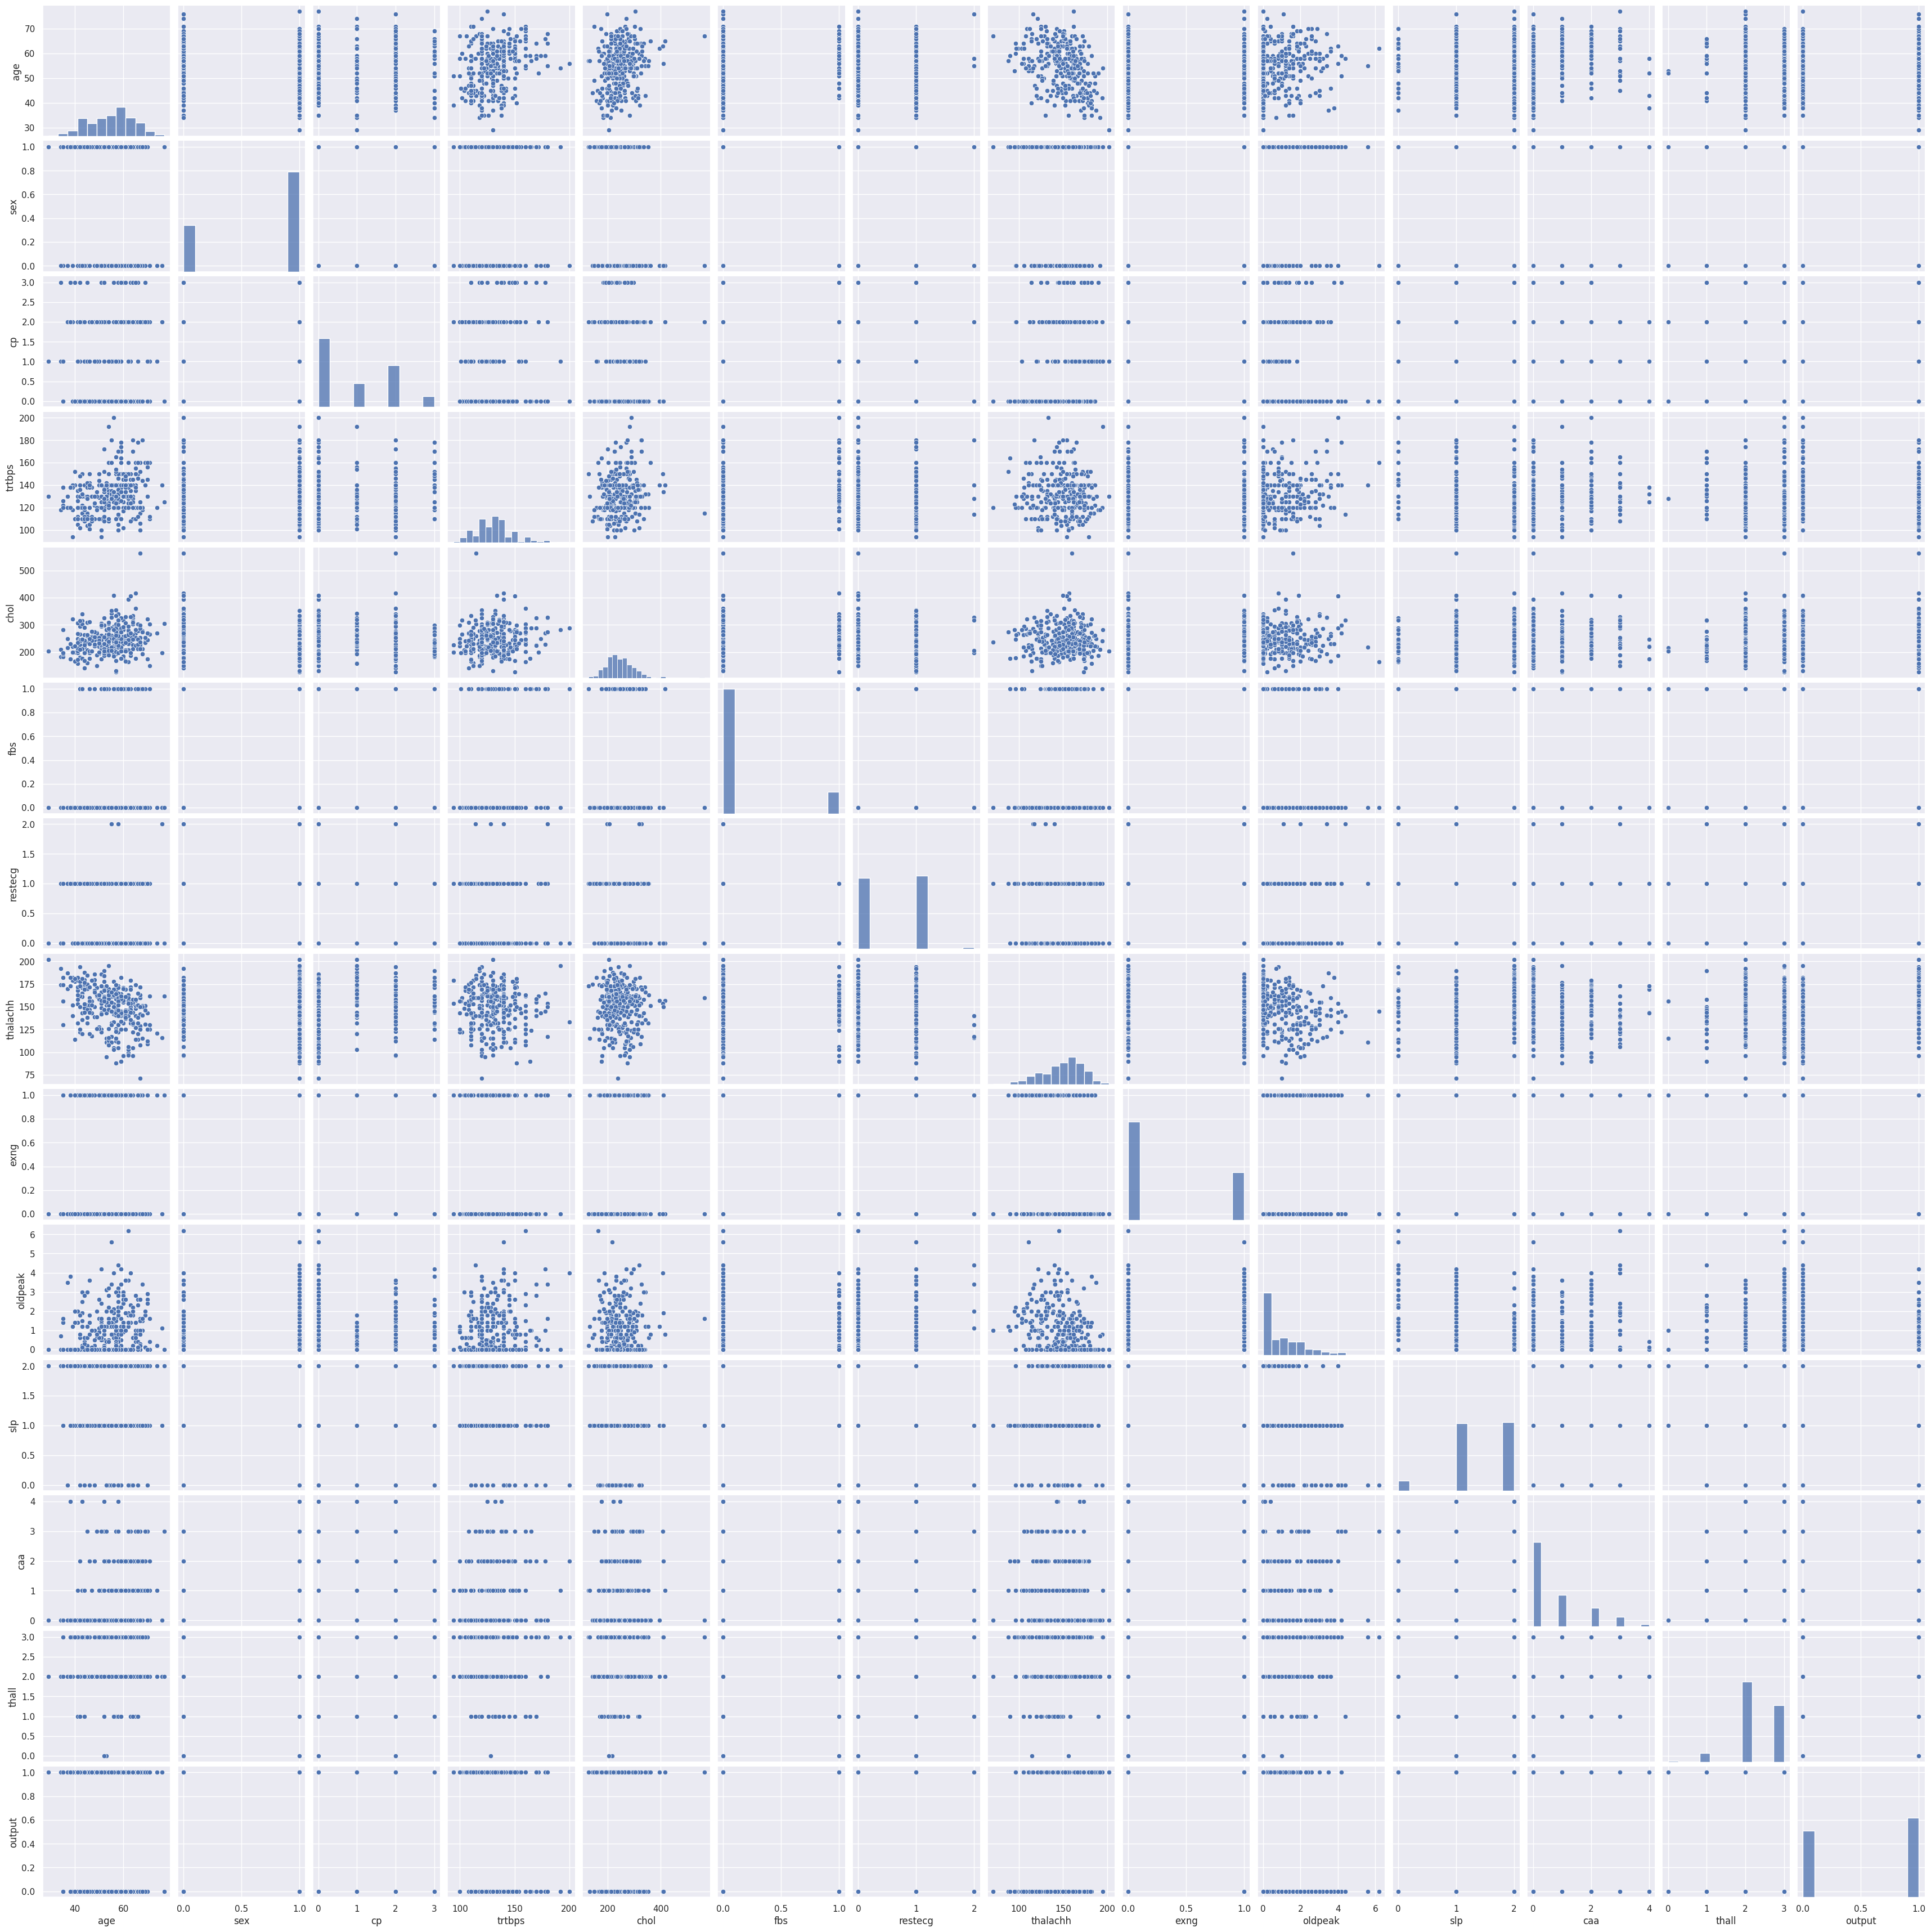

In [13]:
sns.pairplot(heart_dataset)
plt.show()

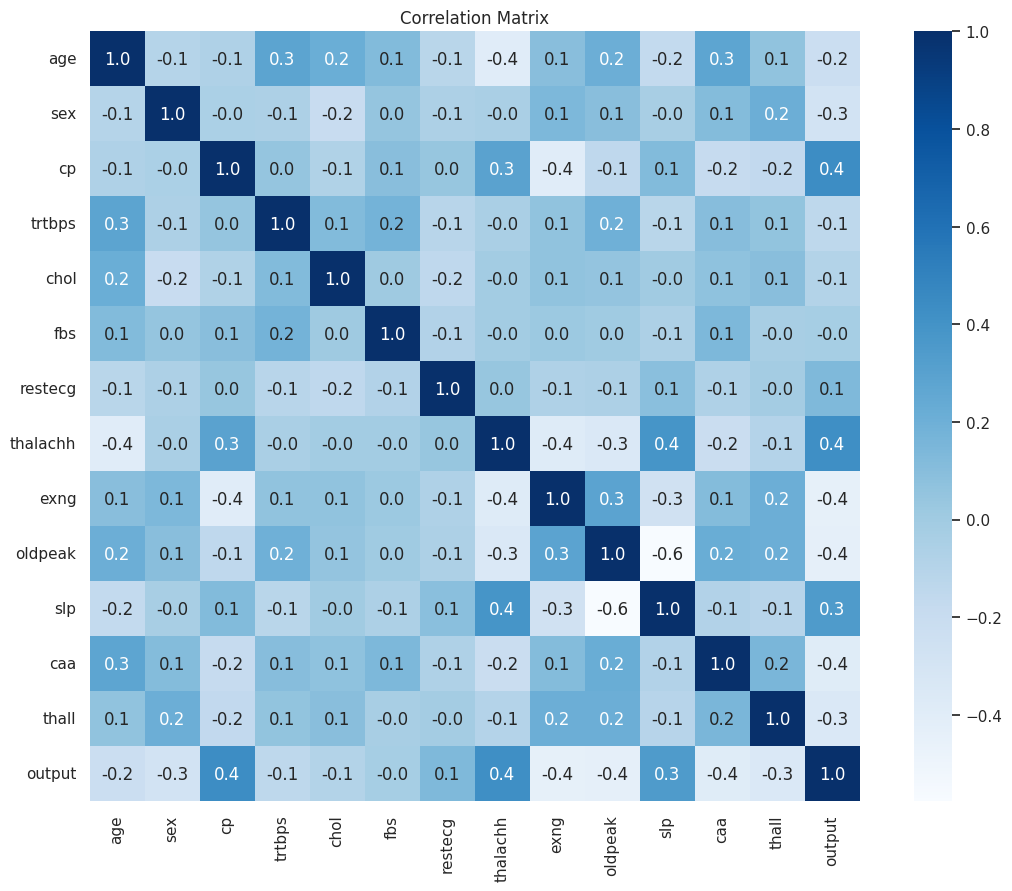

In [14]:
correlation = heart_dataset.corr()
plt.figure(figsize = (14,10))
sns.heatmap(correlation, cbar=True, square= True,fmt= '.1f',annot= True,cmap="Blues")
plt.title("Correlation Matrix")
plt.show()


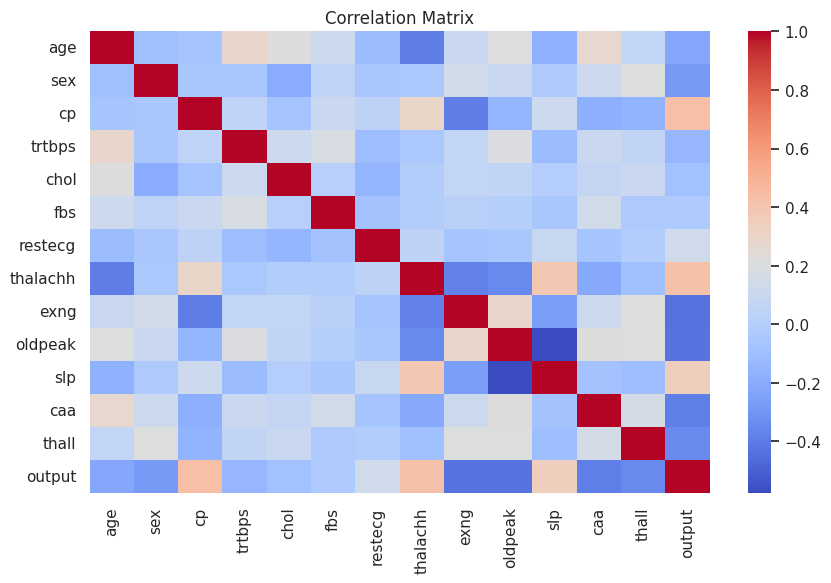

In [15]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(heart_dataset.corr(), cmap= "coolwarm")
plt.title("Correlation Matrix")
plt.show()

<ipython-input-16-de9bac607df2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_dataset['output'])


<Axes: xlabel='output', ylabel='Density'>

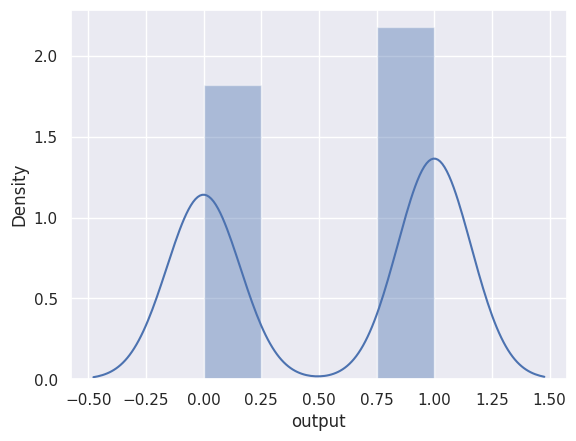

In [16]:
#distribution plot#
sns.distplot(heart_dataset['output'])

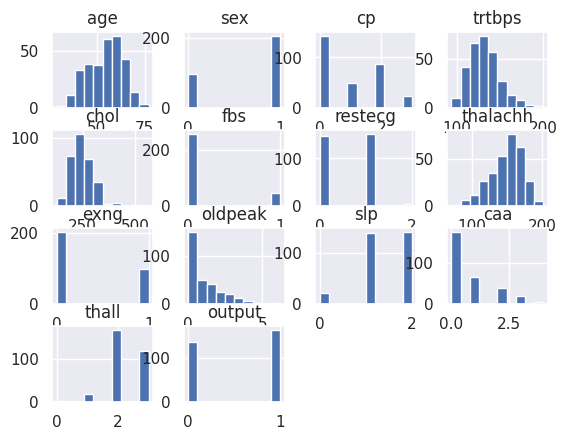

In [59]:
heart_dataset.hist()
pyplot.show()

#Data Standardization#

In [17]:
scaler = StandardScaler()


In [18]:
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [19]:
X = standardized_data
Y = heart_dataset['output']
print(X)
print(Y)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64


#Train test split#

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state=42)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [22]:
scores_accuracy = []

#Comparing the performance of the model#


In [23]:
models=[LogisticRegression(max_iter = 1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=0),
        XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators=100,max_leaves=0),
        AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0),GaussianNB()]

In [24]:
def compare_models_train_test():

  for model in models:

    #training the model3
    model.fit(X_train, Y_train)

    #evaluating the model#
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test,test_data_prediction)

    print('Accuracy score of the' ,model,'=',accuracy)



In [25]:
compare_models_train_test()

Accuracy score of the LogisticRegression(max_iter=1000) = 0.8032786885245902
Accuracy score of the SVC(kernel='linear') = 0.7868852459016393
Accuracy score of the KNeighborsClassifier() = 0.8032786885245902
Accuracy score of the RandomForestClassifier() = 0.7868852459016393
Accuracy score of the DecisionTreeClassifier() = 0.6721311475409836
Accuracy score of the GradientBoostingClassifier(random_state=0) = 0.819672131147541
Accuracy score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=0,
    

The GaussianNB has the highest accuracy

##Cross Validation##


##logistic Regression##

In [26]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X,Y,cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr,2)

print(mean_accuracy_lr)

[0.81967213 0.8852459  0.83606557 0.86666667 0.76666667]
83.49


##Support Vector Machine##

In [27]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X,Y,cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc,2)

print(mean_accuracy_svc)

[0.81967213 0.8852459  0.80327869 0.88333333 0.76666667]
83.16


#KNN#

In [28]:
cv_score_knn = cross_val_score(KNeighborsClassifier(), X,Y, cv=5)

print(cv_score_knn)

mean_accuracy_knn = sum(cv_score_knn)/len(cv_score_knn)

mean_accuracy_knn = mean_accuracy_knn*100

mean_accuracy_knn = round(mean_accuracy_knn,2)

print(mean_accuracy_knn)

[0.78688525 0.85245902 0.80327869 0.86666667 0.75      ]
81.19


#Random Forest#

In [29]:
cv_score_rf = cross_val_score(RandomForestClassifier(), X, Y , cv=5)

print(cv_score_rf)

mean_accuracy_rf = sum(cv_score_rf)/len(cv_score_rf)

mean_accuracy_rf = mean_accuracy_rf*100

mean_accuracy_rf = round(mean_accuracy_rf,2)

print(mean_accuracy_rf)

[0.80327869 0.90163934 0.85245902 0.83333333 0.76666667]
83.15


#Decision Tree#

In [30]:
cv_score_dt = cross_val_score(DecisionTreeClassifier() , X , Y , cv=5)

print(cv_score_dt)

mean_accuracy_dt= sum(cv_score_dt)/len(cv_score_dt)

mean_accuracy_dt = mean_accuracy_dt*100

mean_accuracy_dt = round(mean_accuracy_dt,2)

print(mean_accuracy_dt)

[0.75409836 0.83606557 0.7704918  0.73333333 0.7       ]
75.88


#Gradient Boosting Classifier#

In [31]:
cv_score_gb = cross_val_score(GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.1,
                                                         random_state=0) , X , Y , cv=5)

print(cv_score_gb)

mean_accuracy_gb= sum(cv_score_gb)/len(cv_score_gb)

mean_accuracy_gb = mean_accuracy_gb*100

mean_accuracy_gb = round(mean_accuracy_gb,2)

print(mean_accuracy_gb)

[0.83606557 0.86885246 0.80327869 0.78333333 0.75      ]
80.83


#XGBClassifier#

In [32]:
cv_score_xgb = cross_val_score(XGBClassifier(learning_rate= 0.1, max_depth=10,
                                             n_estimators=100,max_leaves=0) , X , Y , cv=5)

print(cv_score_xgb)

mean_accuracy_xgb= sum(cv_score_xgb)/len(cv_score_xgb)

mean_accuracy_xgb = mean_accuracy_xgb*100

mean_accuracy_xgb= round(mean_accuracy_xgb,2)

print(mean_accuracy_xgb)

[0.81967213 0.83606557 0.78688525 0.78333333 0.76666667]
79.85


In [33]:
cv_score_xgb
mean_accuracy_xgb

79.85

#Ada Boost#

In [34]:
cv_score_ab = cross_val_score(AdaBoostClassifier(learning_rate= 1.0,
                                             n_estimators=50,random_state= 0) , X , Y , cv=5)

print(cv_score_ab)

mean_accuracy_ab= sum(cv_score_ab)/len(cv_score_ab)

mean_accuracy_ab = mean_accuracy_ab*100

mean_accuracy_ab= round(mean_accuracy_ab,2)

print(mean_accuracy_ab)

[0.85245902 0.81967213 0.78688525 0.73333333 0.73333333]
78.51


#Naive Bayes#

In [35]:
cv_score_nv = cross_val_score(GaussianNB() , X , Y , cv=5)

print(cv_score_nv)

mean_accuracy_nv= sum(cv_score_nv)/len(cv_score_nv)

mean_accuracy_nv = mean_accuracy_nv*100

mean_accuracy_nv= round(mean_accuracy_nv,2)

print(mean_accuracy_nv)

[0.80327869 0.8852459  0.78688525 0.83333333 0.71666667]
80.51


#MLP#

In [36]:
cv_score_mlp = cross_val_score(MLPClassifier(alpha=0.0001, learning_rate='constant',
                                             learning_rate_init=0.001,random_state=0) ,
                                X , Y , cv=5)

print(cv_score_mlp)

mean_accuracy_mlp= sum(cv_score_mlp)/len(cv_score_mlp)

mean_accuracy_mlp = mean_accuracy_mlp*100

mean_accuracy_mlp= round(mean_accuracy_mlp,2)

print(mean_accuracy_mlp)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.85245902 0.85245902 0.80327869 0.81666667 0.75      ]
81.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
models=[LogisticRegression(max_iter = 1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=0),
        XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators=100,max_leaves=0),
        AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=0),GaussianNB()]

In [38]:
def compare_models_cross_validation():

  for model in models:
    cv_score = cross_val_score(model,X,Y,cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy= round(mean_accuracy,2)
    print('Cross Validation Accuracies for the',model,'=',cv_score)
    print('Accuracy % of the', model,mean_accuracy)
    print('...........')

In [39]:
compare_models_cross_validation()

Cross Validation Accuracies for the LogisticRegression(max_iter=1000) = [0.81967213 0.8852459  0.83606557 0.86666667 0.76666667]
Accuracy % of the LogisticRegression(max_iter=1000) 83.49
...........
Cross Validation Accuracies for the SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.88333333 0.76666667]
Accuracy % of the SVC(kernel='linear') 83.16
...........
Cross Validation Accuracies for the KNeighborsClassifier() = [0.78688525 0.85245902 0.80327869 0.86666667 0.75      ]
Accuracy % of the KNeighborsClassifier() 81.19
...........
Cross Validation Accuracies for the RandomForestClassifier() = [0.85245902 0.8852459  0.7704918  0.83333333 0.78333333]
Accuracy % of the RandomForestClassifier() 82.5
...........
Cross Validation Accuracies for the DecisionTreeClassifier() = [0.75409836 0.81967213 0.78688525 0.73333333 0.71666667]
Accuracy % of the DecisionTreeClassifier() 76.21
...........
Cross Validation Accuracies for the GradientBoostingClassifier(random_state=0) = [0.836065

After Cross Validation Logistic regression are highly accurate(83.49%)

In [40]:
compare_models_cross_validation()


Cross Validation Accuracies for the LogisticRegression(max_iter=1000) = [0.81967213 0.8852459  0.83606557 0.86666667 0.76666667]
Accuracy % of the LogisticRegression(max_iter=1000) 83.49
...........
Cross Validation Accuracies for the SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.88333333 0.76666667]
Accuracy % of the SVC(kernel='linear') 83.16
...........
Cross Validation Accuracies for the KNeighborsClassifier() = [0.78688525 0.85245902 0.80327869 0.86666667 0.75      ]
Accuracy % of the KNeighborsClassifier() 81.19
...........
Cross Validation Accuracies for the RandomForestClassifier() = [0.81967213 0.90163934 0.78688525 0.8        0.78333333]
Accuracy % of the RandomForestClassifier() 81.83
...........
Cross Validation Accuracies for the DecisionTreeClassifier() = [0.7704918  0.83606557 0.73770492 0.73333333 0.73333333]
Accuracy % of the DecisionTreeClassifier() 76.22
...........
Cross Validation Accuracies for the GradientBoostingClassifier(random_state=0) = [0.83606

#Hyperparameter Tuning#

In [41]:
#list of models
models_list = [LogisticRegression(max_iter=1000),
               SVC(),KNeighborsClassifier(),
               RandomForestClassifier(random_state = 0)]

In [42]:
#creating a dictionary that contains hyperparameter values for the above mentioned models
model_hyperparameters = {


                    'log_reg_hyperparameters':{
                        'C':[1, 5, 10, 20]
                    },

                    'SVC_hyperparameters':{
                        'kernel':['linear','poly','rbf','sigmoid'],
                        'C' : [1, 5, 10, 20]
                    },

                    'KNN_hyperparameters':{
                        'n_neighbors': [3, 5, 10]

                    },

                    'random_forest_hyperparameters':{
                        'n_estimators': [10, 20, 50, 100]
                    }
}

In [43]:
type(model_hyperparameters)

dict

In [44]:
print(model_hyperparameters.keys())
print(model_hyperparameters.values())

dict_keys(['log_reg_hyperparameters', 'SVC_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])
dict_values([{'C': [1, 5, 10, 20]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'n_estimators': [10, 20, 50, 100]}])


In [45]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'SVC_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


Applying GridSearchCV

In [46]:
def ModelSelection(list_of_models,hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)

    classifier = GridSearchCV(model, params, cv = 5)

    #fitting the data to classifier
    classifier.fit(X, Y)

    result.append({
        'model used': model,
        'highest score': classifier.best_score_,
        'best hyperparameters': classifier.best_params_
    })

    result_dataframe = pd.DataFrame(result, columns= ['model used', 'highest score', 'best hyperparameters'])

    return result_dataframe

In [47]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=1000),0.834863,{'C': 1}


RandomizesSearchCV

In [48]:
#loading the logistic regression model

model = LogisticRegression(max_iter=1000)

#hyperparameters

parameters = {
              'C' : [1, 5, 10, 20, 25, 30]
}

#grid search
classifier = RandomizedSearchCV (model, parameters, cv=5)
classifier.fit(X, Y)
classifier.cv_results_

#best parameters

best_parameters = classifier.best_params_
print(best_parameters)


#highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

#dataframe

result = pd.DataFrame (classifier.cv_results_)
result.head()

Randomized_search_result = result[['mean_test_score']]
Randomized_search_result

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'C': 1}
0.8348633879781422


,mean_test_score
0,0.834863
1,0.831585
2,0.828306
3,0.828306
4,0.828306
5,0.828306


#Evaluating Algorithm according to book#

In [53]:
#spot-check algorithm
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('NB',GaussianNB()))
models.append(('MLP',MLPClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv = 5, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.830867 (0.040931)
SVM: 0.806122 (0.040732)
KNN: 0.805867 (0.030447)
RF: 0.822704 (0.051692)
DT: 0.727466 (0.048577)
GBC: 0.797874 (0.058918)
XGB: 0.789541 (0.040382)
ADA: 0.806207 (0.048092)
NB: 0.805782 (0.021138)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP: 0.793537 (0.040440)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


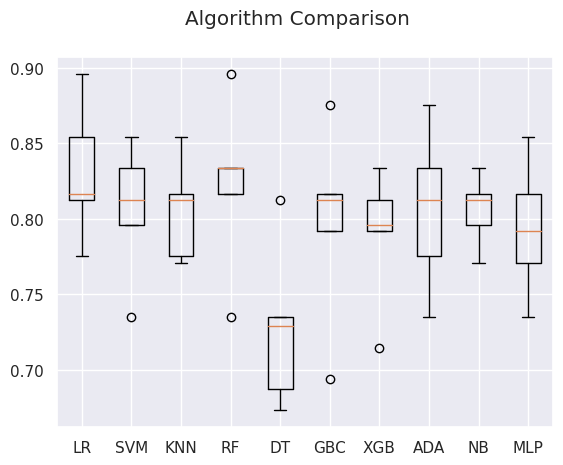

In [58]:
# comparing algorithm
fig = pyplot.figure()
plt.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [70]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'C':[1, 5, 10, 15, 20]}

model = LogisticRegression(random_state = 42)
grid = GridSearchCV(estimator = model, param_grid = param_grid,scoring = 'accuracy' , cv = 5)
grid_result = grid.fit(rescaledX, Y_train)

In [71]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip (means, params):
  print("%f (%f) with: %r" % (mean,param))

Best: 0.830952 using {'C': 5}


TypeError: must be real number, not dict